# Project - ML model development based on Brazil’s Covid-19 dataset

#### Description of Project: 

##### Brazil is among the nations most impacted by the COVID-19 pandemic, with over 16 million confirmed cases and 454 429 confirmed fatalities by May 26, 2021. (according to the Johns Hopkins Coronavirus Resource Center).
#### In the first wave of Covid-19, Brazil was one of the countries most affected by the disease, which occurred on 26th February 2020 and reached community transmission on 20th March 2019. Consequently, Brazil was unable to respond because of the strain on hospital capacity, such as the intense and lengthy demand for ICU (incentive care unit) beds, healthcare professionals, personal protection equipment, and healthcare resources.
#### An ICU bed strain reduction effort is being conducted by a team of data scientists at Sirio Libanês hospital in Brazil. Their aim is to develop a machine learning model that can predict whether patients with confirmed COVID-19 cases would need to be admitted to the ICU.  To achieve that objective, the team collected clinical data from COVID patients as well as the target group (those admitted to the ICU). 
#### The dataset is released on Kaggle platform with full data description at the following URL (https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) by the team seeking interesting solutions and findings from the public. 

#### The classification goal is to predict if a patient of confirmed COVID-19 case would require admission to the ICU (variable ICU).

#### The following sections describe the scope and deliverables of the project.
* 1 (Exploratory data analysis)
* 2 (Data Pre-processing) 
* 3 (Model creation after hyperparameter tuning) 
* 4 (Conclusion)
 

#  Import required libraries

In [3]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score  
from sklearn.metrics import precision_score, recall_score

#Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

%matplotlib inline

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore') 

np.random.seed(614)


# Loading the dataset

COVID-19 - Clinical Data to predict patient ICU admission <br>
https://www.kaggle.com/S%C3%ADrio-Libanes/covid19 <br>

In [4]:
# Read the excel file using pandas dataframe
covidDf = pd.read_excel(r'Kaggle_Sirio_Libanes_ICU_Prediction.xlsx', sheet_name='Sheet1')

### Check the size of the dataset

In [5]:
dfShape=covidDf.shape
print('There are {} records and {} features in the dataset.'.format(dfShape[0],dfShape[1]))

There are 1925 records and 231 features in the dataset.


### Print the top 10 records from the dataset

In [6]:
covidDf.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


* There are five entries per patients which shows different phases of a patient's journey since admission.
* Most of the feature values are numeric values.
* As per information from Kaggle the data has been cleaned and scaled by column according to Min Max Scaler to fit between -1     and 1.
* There are many features having null value which will be examined further.
* Identifier for the patient's visit can be found in PATIENT_VISIT_IDENTIFIER column.
* A patient has five rows, each representing a time window, which can be viewed via the WINDOW feature, starting from admission   to over 12 hours.
* The target column is ICU.

### Print the last 10 records from the dataset

In [7]:
covidDf.tail(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1915,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
1916,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
1917,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1918,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
1919,383,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
1924,384,0,50th,1,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.547619,-0.838384,-0.701863,-0.585967,-0.763868,-0.612903,-0.551337,-0.835052,ABOVE_12,0


# Exploratory Data Analysis

### Check the datatypes of all features

In [8]:
covidDf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   object 
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

Observations:

* The available features are of type  integer, float and object. 
* Object data type indicate categorical fields which need to be converted to categorical data type.
* First four columns (PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER) and last two columns (WINDOW,ICU) are the
  only columns having full values.
* All other columns are having missing values.
* AGE_PERCENTIL and WINDOW are the only Object datatypes which need to be converted to categorical type and later will do         encoding before building model.
* Column from 4 to 12 contain 1920 non-null values , that means only 5 rows with missing values.
* All other columns have many missing values.
* Columns from 13 to 192 have same number of data ie 821. These are clinical data.


### Check how many different types of features are in the dataset

In [9]:
#Check how many different types of features are in the dataset
covidDf.dtypes.value_counts()

float64    225
int64        4
object       2
dtype: int64

* There are 225 features of float type, 4 features of integer type and 2 feature of object type

### Inspecting Categorical Columns

In [10]:
# Converting object type to categorical type
for col in covidDf.columns:
    if(covidDf[col].dtype=='object'):
        covidDf[col]=covidDf[col].astype('category')

In [11]:
#Check the datatpe
covidDf.dtypes.value_counts()

float64     225
int64         4
category      1
category      1
dtype: int64

In [12]:
catColumn=covidDf.select_dtypes(include=['category'])
for col in catColumn:
    print(f'\nColumn: {col}')
    print(covidDf[col].value_counts())


Column: AGE_PERCENTIL
20th          215
10th          205
30th          205
40th          200
70th          195
50th          190
80th          190
60th          185
Above 90th    185
90th          155
Name: AGE_PERCENTIL, dtype: int64

Column: WINDOW
0-2         385
2-4         385
4-6         385
6-12        385
ABOVE_12    385
Name: WINDOW, dtype: int64


In [13]:
# Check the data ditribution of categorical features
covidDf.describe(include='category')

,AGE_PERCENTIL,WINDOW
count,1925,1925
unique,10,5
top,20th,0-2
freq,215,385


In [14]:
covidDf['WINDOW'].unique()

['0-2', '2-4', '4-6', '6-12', 'ABOVE_12']
Categories (5, object): ['0-2', '2-4', '4-6', '6-12', 'ABOVE_12']

In [15]:
covidDf['AGE_PERCENTIL'].unique()

['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th', '30th', 'Above 90th']
Categories (10, object): ['10th', '20th', '30th', '40th', ..., '70th', '80th', '90th', 'Above 90th']

* WINDOW and AGE_PERCENTIL column need to be encoded which will be handled in data preprocessing section

### Inspecting Numerical Features

In [16]:
pd.options.display.max_rows = 999
covidDf.describe(exclude='category',).T

,count,mean,std,min,25%,50%,75%,max
PATIENT_VISIT_IDENTIFIER,1925.0,192.000000,111.168431,0.0,96.000000,192.000000,288.000000,384.0
AGE_ABOVE65,1925.0,0.467532,0.499074,0.0,0.000000,0.000000,1.000000,1.0
GENDER,1925.0,0.368831,0.482613,0.0,0.000000,0.000000,1.000000,1.0
DISEASE GROUPING 1,1920.0,0.108333,0.310882,0.0,0.000000,0.000000,0.000000,1.0
DISEASE GROUPING 2,1920.0,0.028125,0.165373,0.0,0.000000,0.000000,0.000000,1.0
DISEASE GROUPING 3,1920.0,0.097917,0.297279,0.0,0.000000,0.000000,0.000000,1.0
DISEASE GROUPING 4,1920.0,0.019792,0.139320,0.0,0.000000,0.000000,0.000000,1.0
DISEASE GROUPING 5,1920.0,0.128125,0.334316,0.0,0.000000,0.000000,0.000000,1.0
DISEASE GROUPING 6,1920.0,0.046875,0.211426,0.0,0.000000,0.000000,0.000000,1.0
HTN,1920.0,0.213021,0.409549,0.0,0.000000,0.000000,0.000000,1.0


* Values are in the range from -1 to 1.
* Values also indicate skewness which implies outliers.
* Outliers will be handled in pre-processing section later.

### Check for duplicate values

In [603]:
covidDf.duplicated().any()

False

Observations:
* No duplicated records.
* But from closely examining the dataset it's showing that many columns having repeated values.
* Checking whether column values are repeated are done below.

In [17]:
# Function to return duplicated columns
def getDuplicateColumnsFromDF(ds):
    
    dupColumnNames = set()    
    for i in range(ds.shape[1]):        
        column = ds.iloc[:, i]        
        for j in range(i + 1, ds.shape[1]):            
            othColumn = ds.iloc[:, j] 
            if column.equals(othColumn):
                dupColumnNames.add(ds.columns.values[j])     
    return list(dupColumnNames)

duplicateCol = getDuplicateColumnsFromDF(covidDf)
duplicateCol.sort()
 
print("Duplicate columns:")
for column in duplicateCol:
    print(column)
    


Duplicate columns:
ALBUMIN_MAX
ALBUMIN_MEAN
ALBUMIN_MIN
BE_ARTERIAL_DIFF
BE_ARTERIAL_MAX
BE_ARTERIAL_MEAN
BE_ARTERIAL_MIN
BE_VENOUS_DIFF
BE_VENOUS_MAX
BE_VENOUS_MEAN
BE_VENOUS_MIN
BIC_ARTERIAL_DIFF
BIC_ARTERIAL_MAX
BIC_ARTERIAL_MEAN
BIC_ARTERIAL_MIN
BIC_VENOUS_DIFF
BIC_VENOUS_MAX
BIC_VENOUS_MEAN
BIC_VENOUS_MIN
BILLIRUBIN_DIFF
BILLIRUBIN_MAX
BILLIRUBIN_MEAN
BILLIRUBIN_MIN
BLAST_DIFF
BLAST_MAX
BLAST_MEAN
BLAST_MIN
CALCIUM_DIFF
CALCIUM_MAX
CALCIUM_MEAN
CALCIUM_MIN
CREATININ_DIFF
CREATININ_MAX
CREATININ_MEAN
CREATININ_MIN
DIMER_DIFF
DIMER_MAX
DIMER_MEAN
DIMER_MIN
FFA_DIFF
FFA_MAX
FFA_MEAN
FFA_MIN
GGT_DIFF
GGT_MAX
GGT_MEAN
GGT_MIN
GLUCOSE_DIFF
GLUCOSE_MAX
GLUCOSE_MEAN
GLUCOSE_MIN
HEMATOCRITE_DIFF
HEMATOCRITE_MAX
HEMATOCRITE_MEAN
HEMATOCRITE_MIN
HEMOGLOBIN_DIFF
HEMOGLOBIN_MAX
HEMOGLOBIN_MEAN
HEMOGLOBIN_MIN
INR_DIFF
INR_MAX
INR_MEAN
INR_MIN
LACTATE_DIFF
LACTATE_MAX
LACTATE_MEAN
LACTATE_MIN
LEUKOCYTES_DIFF
LEUKOCYTES_MAX
LEUKOCYTES_MEAN
LEUKOCYTES_MIN
LINFOCITOS_DIFF
LINFOCITOS_MAX
LINFOCITOS_

In [18]:
print("\nTotal number of duplicated columns: {}".format(len(duplicateCol)))


Total number of duplicated columns: 143


* There are 143 columns whose values are repeated. They will be handled in the preprocessing section.
 

In [19]:
# Find the columns having only one unique value
countUnique = covidDf.nunique()
uniqueColToDel = [c for c,j in enumerate(countUnique) if j == 1]
print(covidDf.columns[uniqueColToDel])


Index(['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF',
       'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_DIFF',
       'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF',
       'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF',
       'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF',
       'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF',
       'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF',
       'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF',
       'POTASSIUM_DIFF', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF',
       'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF',
       'DIMER_DIFF'],
      dtype='object')


### Missing Values

In [20]:
# Check missing values
covidDf.isnull().values.any()

True

In [21]:
# Check missing value count per column
covidDf.isnull().sum()

PATIENT_VISIT_IDENTIFIER               0
AGE_ABOVE65                            0
AGE_PERCENTIL                          0
GENDER                                 0
DISEASE GROUPING 1                     5
DISEASE GROUPING 2                     5
DISEASE GROUPING 3                     5
DISEASE GROUPING 4                     5
DISEASE GROUPING 5                     5
DISEASE GROUPING 6                     5
HTN                                    5
IMMUNOCOMPROMISED                      5
OTHER                                  5
ALBUMIN_MEDIAN                      1104
ALBUMIN_MEAN                        1104
ALBUMIN_MIN                         1104
ALBUMIN_MAX                         1104
ALBUMIN_DIFF                        1104
BE_ARTERIAL_MEDIAN                  1104
BE_ARTERIAL_MEAN                    1104
BE_ARTERIAL_MIN                     1104
BE_ARTERIAL_MAX                     1104
BE_ARTERIAL_DIFF                    1104
BE_VENOUS_MEDIAN                    1104
BE_VENOUS_MEAN  

* Many columns are having missing values which will be handled in preprocessing section

### Check for ouput imbalance

In [25]:
covidDf['ICU'].value_counts(normalize=True)

0    0.732468
1    0.267532
Name: ICU, dtype: float64

Observation:
 * Output column is imbalanced
 * We will handle this using SMOTE in model building section

## Graphical Analysis

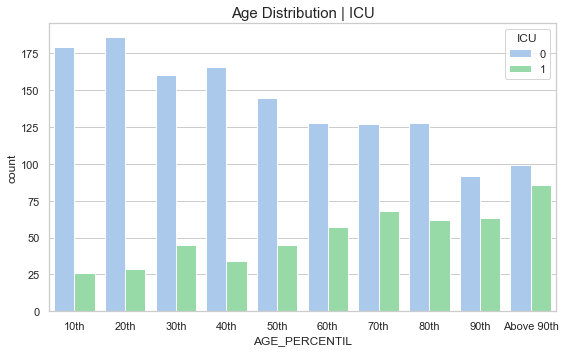

In [26]:
# Check age percentile balance
plt.figure(figsize=(8,5))
plt.title('Age Distribution | ICU', fontsize=15)
sns.countplot('AGE_PERCENTIL',hue="ICU",data=covidDf, palette=sns.color_palette("pastel6").as_hex())
plt.tight_layout()


Observation:
   * People with age above 60 have high chances of going to ICU

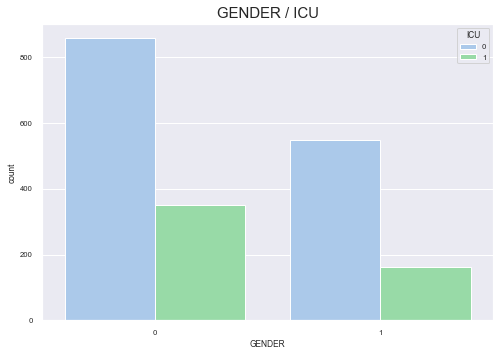

In [741]:
# Check Gender / ICU Count
plt.figure(figsize=(7,5))
plt.title('GENDER / ICU', fontsize=15)
gicu = sns.countplot(x="GENDER", hue="ICU", data=covidDf,palette=sns.color_palette("pastel6").as_hex())
plt.tight_layout()

Observations:
* Gender 0 is slightly more at risk.
* Other factors may also influence the high ICU count

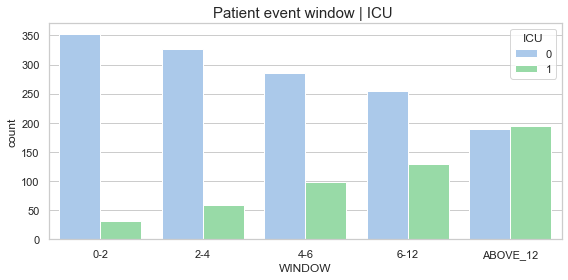

In [27]:
# Patient event window 
plt.figure(figsize=(8,4))
plt.title('Patient event window | ICU ', fontsize=15)
sns.countplot(covidDf['WINDOW'], hue='ICU', data=covidDf, palette=sns.color_palette("pastel6").as_hex())
plt.tight_layout()

Observation:
  * Overtime more patient are getting admitted to ICU
  * If patient has strong symptoms on arriving at the hospital he should be directly admitted to ICU
  * It is better if we can determine whether the patient will require a bed as soon as possible.   

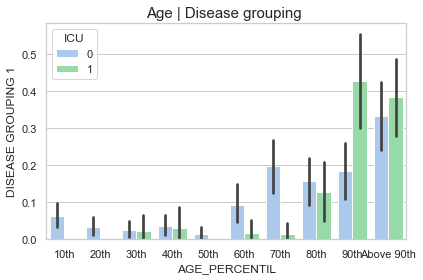

In [29]:
# Ages with Disease Grouping 1
plt.title('Age | Disease grouping ', fontsize=15)
sns.barplot(covidDf['AGE_PERCENTIL'], y='DISEASE GROUPING 1', hue='ICU', data=covidDf, palette=sns.color_palette("pastel6").as_hex())
plt.tight_layout()

Observation:
   * There is a high likelihood that patients in first category of diseases who are over 90 will be referred to the ICU.

<AxesSubplot:xlabel='AGE_ABOVE65', ylabel='count'>

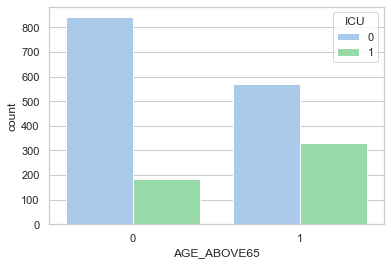

In [31]:
 # Check AGE_ABOVE65 Vs ICU
sns.countplot(x="AGE_ABOVE65", hue="ICU", data=covidDf,palette=sns.color_palette("pastel6").as_hex())

Observations
* People over 65 are more likely to require an ICU.

# Data Preprocessing

### Handle Missing Values

* Column from 4 to 12 are having only 5 missing values. 
* They are categorical columns.
* Let's list those records

In [32]:
null_catColmn = covidDf[covidDf.iloc[:,4:13].isnull().any(axis=1)].T
null_catColmn

,995,996,997,998,999
PATIENT_VISIT_IDENTIFIER,199,199,199,199,199
AGE_ABOVE65,0,0,0,0,0
AGE_PERCENTIL,10th,10th,10th,10th,10th
GENDER,0,0,0,0,0
DISEASE GROUPING 1,NaN,NaN,NaN,NaN,NaN
DISEASE GROUPING 2,NaN,NaN,NaN,NaN,NaN
DISEASE GROUPING 3,NaN,NaN,NaN,NaN,NaN
DISEASE GROUPING 4,NaN,NaN,NaN,NaN,NaN
DISEASE GROUPING 5,NaN,NaN,NaN,NaN,NaN
DISEASE GROUPING 6,NaN,NaN,NaN,NaN,NaN


Observation:
* After closely examining the 5 null values it shows that the data for patient identifier 199 are all null, so we can drop
  these five rows.

In [33]:
# Drop data for above identified rows
covidDf.drop(null_catColmn.T.index,inplace=True)


In [34]:
covidDf.shape

(1920, 231)

* Data from column 14 to 228 are the clinical observation data of patient per window
* Considering that conditions of the patient will not substantially change between windows, we can capture the details from each   patient's prior windows.

In [35]:
# function to fill patient's health data from previous window entry

def fillMissingPatientsData(ds):

    healthDataCol=covidDf.iloc[:,13:229].columns 
    healthDataColFilled=covidDf.groupby('PATIENT_VISIT_IDENTIFIER',as_index=False)[healthDataCol].fillna(method='ffill').fillna(method='bfill')

    catDataValues = covidDf.iloc[:,:13]

    icuWindowValues = covidDf.iloc[:,-2:]

    reFilledDataset = pd.concat([catDataValues,
                                 healthDataColFilled, 
                                 icuWindowValues], 
                                ignore_index=True, axis=1)
    reFilledDataset.columns = covidDf.columns

    return reFilledDataset


In [36]:
# Call the above function to fill missing clinical data
filledCovidDf = fillMissingPatientsData(covidDf)
filledCovidDf.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
6,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
7,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,1
8,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,90th,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1


In [37]:
filledCovidDf.isnull().values.any()

False

Observations:
* Patients health record data has been filled as per his previous record
* Patient data record for PATIENT_VISIT_IDENTIFIER 199 are all null, so these 5 records have been removed
* Now all the missing values has been handled

### Handling duplicate columns

* We have identified 143 features whose values are identical. These are clinical observation findings. These identical columns     will not contribute to learning by the model, so it's better to keep only one feature and remove all other.

In [38]:
filledCovidDf.shape

(1920, 231)

In [39]:
#covidDf.T.drop_duplicates(inplace=True)
sizeDfBefore = filledCovidDf.shape[1]
filledCovidDf.drop(columns=duplicateCol, inplace=True)
sizeDfAfter = filledCovidDf.shape[1]

print(f"Dataset Size Before = {sizeDfBefore}")
print(f"Dataset Size After = {sizeDfAfter}")
print("")
print(f"Total Columns Removed = {sizeDfBefore - sizeDfAfter}")

Dataset Size Before = 231
Dataset Size After = 88

Total Columns Removed = 143


In [40]:
filledCovidDf.shape

(1920, 88)

Observation:
* 143 duplicated columns has been removed

In [41]:
# Find the columns having only one unique value
countUnique = filledCovidDf.nunique()
uniqueColToDel = [c for c,j in enumerate(countUnique) if j == 1]
print(filledCovidDf.columns[uniqueColToDel])



Index(['ALBUMIN_DIFF'], dtype='object')


Observation:
* ALBUMIN_DIFF having all constant values. This column can also be removed.

In [42]:
filledCovidDf.drop(columns = 'ALBUMIN_DIFF',inplace=True)

In [43]:
filledCovidDf.shape

(1920, 87)

As per information from kaggle , the patients who arrive at the hospital and directly shifted to ICU in the first windows(0-2)
can not be used for prediction . This data need to be removed

In [44]:
patientsAlreadyInICU=filledCovidDf.loc[(filledCovidDf['WINDOW'] == '0-2' ) & (filledCovidDf['ICU'] == 1)]["PATIENT_VISIT_IDENTIFIER"].values
patientsAlreadyInICU

array([  1,  17,  27,  41,  47,  48,  54,  62,  85,  90, 104, 106, 109,
       117, 144, 176, 202, 206, 226, 233, 239, 261, 270, 282, 286, 306,
       315, 329, 359, 362, 366, 379], dtype=int64)

In [45]:
FinalCovidDF= filledCovidDf[~filledCovidDf.PATIENT_VISIT_IDENTIFIER.isin(patientsAlreadyInICU)]
FinalCovidDF.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [46]:
print("Number of patients:")
len(FinalCovidDF.groupby("PATIENT_VISIT_IDENTIFIER").count().index)

Number of patients:


352

Obeservation:

* There are currently 352 patients in the cleaned final dataset

* As per information from the kaggle author has suggested to use information of the patient arriving in first window for           modelling as this data is more clinically relevant
* Checking the dataset if patient got admitted to ICU any window then a new column Final_ICU will recieve 1

In [47]:
FinalCovidDF['Final_ICU'] = FinalCovidDF.groupby(['PATIENT_VISIT_IDENTIFIER'])['ICU'].transform(max)
FinalCovidDF.head(100)


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Final_ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,1
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0,1
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0,1
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,0,1
11,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,2-4,0,1
12,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,4-6,0,1
13,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.797980,-0.658863,-0.563758,-0.721834,-0.926882,-1.000000,-0.801293,6-12,0,1
14,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1,1


In [48]:
FinalCovidDF.shape

(1760, 88)

* Now the target column for prediction is 'Final_ICU'

We will use patient's record from first window(0-2) for prediction

In [49]:
FinalCovidDF = FinalCovidDF[FinalCovidDF.WINDOW == "0-2"].reset_index(drop = True)
FinalCovidDF.shape

(352, 88)

   * The final dataset contains the clinical data of patient's in the first window (0-2)
   * There are total 352 patient records and target variable is now Final_ICU

In [50]:
pd.set_option('display.max_rows', len(FinalCovidDF.dtypes))
FinalCovidDF.dtypes

PATIENT_VISIT_IDENTIFIER               int64
AGE_ABOVE65                            int64
AGE_PERCENTIL                       category
GENDER                                 int64
DISEASE GROUPING 1                   float64
DISEASE GROUPING 2                   float64
DISEASE GROUPING 3                   float64
DISEASE GROUPING 4                   float64
DISEASE GROUPING 5                   float64
DISEASE GROUPING 6                   float64
HTN                                  float64
IMMUNOCOMPROMISED                    float64
OTHER                                float64
ALBUMIN_MEDIAN                       float64
BE_ARTERIAL_MEDIAN                   float64
BE_VENOUS_MEDIAN                     float64
BIC_ARTERIAL_MEDIAN                  float64
BIC_VENOUS_MEDIAN                    float64
BILLIRUBIN_MEDIAN                    float64
BLAST_MEDIAN                         float64
CALCIUM_MEDIAN                       float64
CREATININ_MEDIAN                     float64
FFA_MEDIAN

In [51]:
FinalCovidDF.shape

(352, 88)

### Encoding on categorical column

In [52]:
# Function to perform label encoding on 'AGE_PERCENTIL' and 'WINDOW' columns
def encodeCategoricalFeature():     
    agePercentileCol = FinalCovidDF['AGE_PERCENTIL'].replace({ '10th':0.1, '20th':0.2,
                                                           '30th':0.3, '40th':0.4,
                                                           '50th': 0.5,'60th':0.6,
                                                           '70th':0.7, '80th':0.8, 
                                                           '90th':0.9, 'Above 90th':0.9})  
    
    # encoding WINDOW column
    windowCol = FinalCovidDF['WINDOW'].replace({'0-2': 1,'2-4': 2,'4-6':3, '6-12': 4 , 'ABOVE_12':5})    
    FinalCovidDF['AGE_PERCENTIL'] = agePercentileCol
    FinalCovidDF['WINDOW'] = windowCol

In [53]:
encodeCategoricalFeature()

 Now we can convert categorical column to numerical type

In [54]:
FinalCovidDF['AGE_PERCENTIL']=FinalCovidDF['AGE_PERCENTIL'].astype('float64')
FinalCovidDF['WINDOW']=FinalCovidDF['WINDOW'].astype('int64')

In [55]:
# Check the datatype
FinalCovidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          352 non-null    int64  
 1   AGE_ABOVE65                       352 non-null    int64  
 2   AGE_PERCENTIL                     352 non-null    float64
 3   GENDER                            352 non-null    int64  
 4   DISEASE GROUPING 1                352 non-null    float64
 5   DISEASE GROUPING 2                352 non-null    float64
 6   DISEASE GROUPING 3                352 non-null    float64
 7   DISEASE GROUPING 4                352 non-null    float64
 8   DISEASE GROUPING 5                352 non-null    float64
 9   DISEASE GROUPING 6                352 non-null    float64
 10  HTN                               352 non-null    float64
 11  IMMUNOCOMPROMISED                 352 non-null    float64
 12  OTHER   

### Handling Correlation 

In [56]:
corDF=FinalCovidDF.corr() # It will show correlation matrix 
corDF

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,Final_ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.017361,0.032726,0.071961,0.058683,0.022828,0.045907,-0.026074,-0.005678,0.021964,...,-0.018859,-0.051978,-0.080779,-0.059587,-0.030755,-0.045456,-0.015996,NaN,NaN,-0.041382
AGE_ABOVE65,-0.017361,1.000000,0.883263,0.031830,0.280326,0.051308,0.165905,0.032608,0.314536,0.003930,...,-0.030515,0.009262,-0.039387,0.002790,-0.021190,0.029317,-0.031404,NaN,NaN,0.291010
AGE_PERCENTIL,0.032726,0.883263,1.000000,0.052690,0.281955,0.059545,0.137924,0.020286,0.329093,-0.034587,...,-0.035635,0.012609,-0.061004,-0.038093,-0.043105,-0.003827,-0.035026,NaN,NaN,0.348554
GENDER,0.071961,0.031830,0.052690,1.000000,0.036528,-0.001784,-0.064757,-0.069768,-0.019812,-0.020573,...,0.028744,-0.011922,-0.021507,0.074222,-0.014353,-0.011416,0.029412,NaN,NaN,-0.117938
DISEASE GROUPING 1,0.058683,0.280326,0.281955,0.036528,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,...,-0.056287,-0.050070,-0.054745,0.093512,-0.052568,-0.039692,-0.056984,NaN,NaN,0.071825
DISEASE GROUPING 2,0.022828,0.051308,0.059545,-0.001784,0.196347,1.000000,0.084392,0.114818,0.112878,-0.032173,...,0.085122,0.070419,0.016917,0.005102,-0.003487,-0.024682,0.099019,NaN,NaN,0.087753
DISEASE GROUPING 3,0.045907,0.165905,0.137924,-0.064757,0.278271,0.084392,1.000000,0.308875,0.293259,0.275760,...,0.005011,-0.004373,0.020683,-0.011633,-0.008895,0.003183,0.006110,NaN,NaN,0.122514
DISEASE GROUPING 4,-0.026074,0.032608,0.020286,-0.069768,0.017529,0.114818,0.308875,1.000000,0.128287,0.171438,...,-0.026121,-0.043714,-0.029596,-0.034997,0.023616,0.034426,-0.025072,NaN,NaN,0.112573
DISEASE GROUPING 5,-0.005678,0.314536,0.329093,-0.019812,0.340370,0.112878,0.293259,0.128287,1.000000,0.129836,...,-0.098081,-0.017232,-0.059434,-0.045113,-0.058564,-0.080693,-0.097014,NaN,NaN,0.122200
DISEASE GROUPING 6,0.021964,0.003930,-0.034587,-0.020573,0.202849,-0.032173,0.275760,0.171438,0.129836,1.000000,...,-0.033707,-0.036546,0.003571,0.018891,-0.049022,0.005691,-0.033472,NaN,NaN,-0.026684


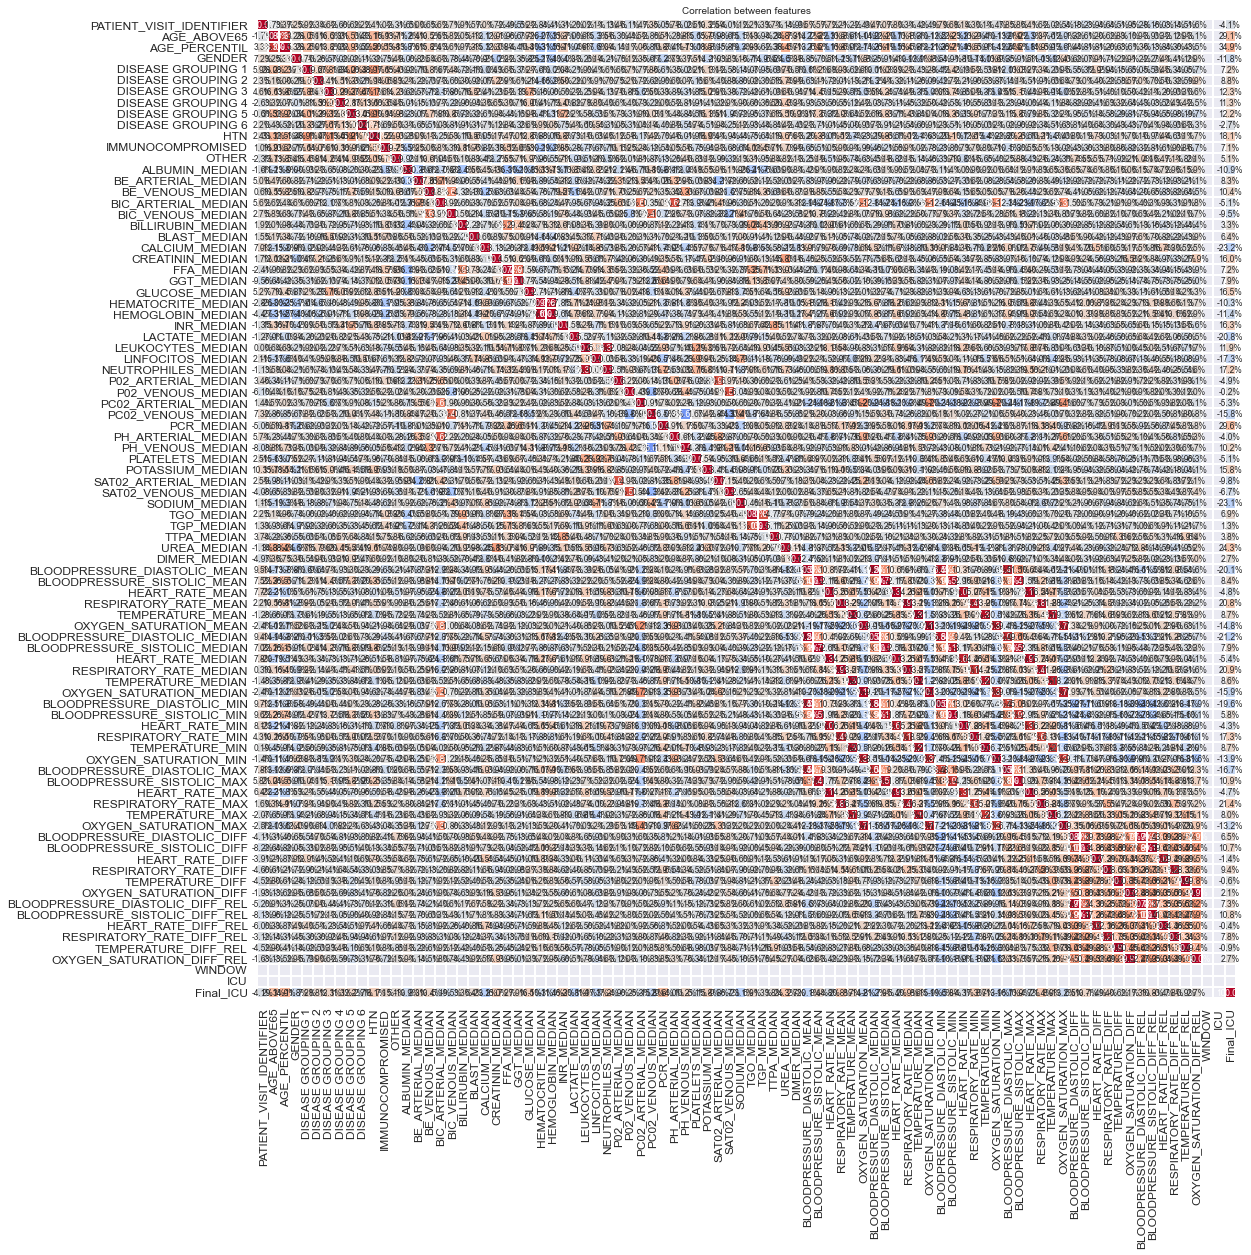

In [58]:
# plot correlation using heatmap
sns.set(font_scale=0.7)
figg,axx=plt.subplots(figsize=(20,18))
sns.heatmap(corDF,cmap='coolwarm', annot=True,linewidths=0.02,center=0,linecolor="white",cbar=False,square=True, fmt=".1%")
plt.title('Correlation between features',fontsize=10)
axx.tick_params(labelsize=12)

Observation:

 * There are many columns which are highly correlated
 * So the columns having correlation above 80% will be removed

In [60]:
def removeCorrelatedCols(df, perc):  
    
    correln = df.corr()  
    
    # Select only top triangle
    correln = correln.where(np.triu(np.ones_like(correln),k=1).astype(np.bool))
    correln = correln.abs()

    # selecting columns with correlation above factor
    
    colsToDrop = []
    
    for col in correln.columns:
        
        if any(correln[col]>perc):
            colsToDrop.append(col)
    
    newData = df.drop(colsToDrop,axis=1)
    
    return newData

In [61]:
sizeDfBefore = FinalCovidDF.shape[1]
FinalCovidDF=removeCorrelatedCols(FinalCovidDF,.8)
sizeDfAfter = FinalCovidDF.shape[1]

print(f"Dataset Size Before = {sizeDfBefore}")
print(f"Dataset Size After = {sizeDfAfter}")
print("")
print(f"Total Columns Removed = {sizeDfBefore - sizeDfAfter}")

Dataset Size Before = 88
Dataset Size After = 58

Total Columns Removed = 30


### Handle Outlier

In [62]:
# Columns to check for outliers
FinalCovidDF.iloc[:,13:-3].columns

Index(['BE_ARTERIAL_MEDIAN', 'BE_VENOUS_MEDIAN', 'BIC_ARTERIAL_MEDIAN',
       'BIC_VENOUS_MEDIAN', 'BILLIRUBIN_MEDIAN', 'BLAST_MEDIAN',
       'CALCIUM_MEDIAN', 'CREATININ_MEDIAN', 'FFA_MEDIAN', 'GGT_MEDIAN',
       'GLUCOSE_MEDIAN', 'HEMATOCRITE_MEDIAN', 'INR_MEDIAN', 'LACTATE_MEDIAN',
       'LEUKOCYTES_MEDIAN', 'LINFOCITOS_MEDIAN', 'P02_ARTERIAL_MEDIAN',
       'P02_VENOUS_MEDIAN', 'PC02_ARTERIAL_MEDIAN', 'PC02_VENOUS_MEDIAN',
       'PCR_MEDIAN', 'PH_VENOUS_MEDIAN', 'PLATELETS_MEDIAN',
       'POTASSIUM_MEDIAN', 'SAT02_ARTERIAL_MEDIAN', 'SODIUM_MEDIAN',
       'TGO_MEDIAN', 'TTPA_MEDIAN', 'UREA_MEDIAN', 'DIMER_MEDIAN',
       'BLOODPRESSURE_DIASTOLIC_MEAN', 'BLOODPRESSURE_SISTOLIC_MEAN',
       'HEART_RATE_MEAN', 'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN',
       'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_DIASTOLIC_DIFF',
       'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF'],
      dtype='object')

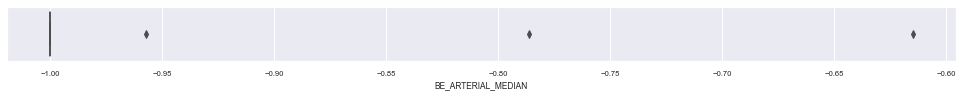

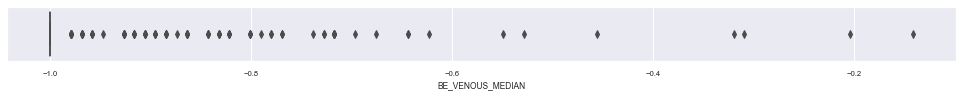

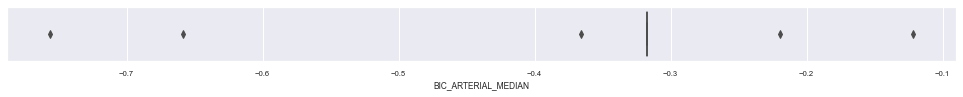

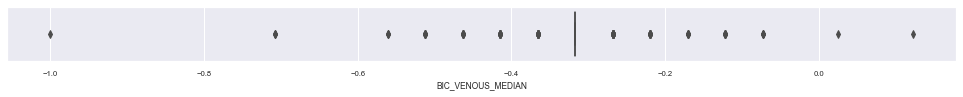

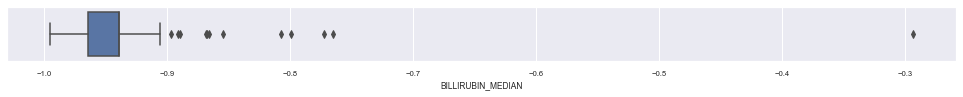

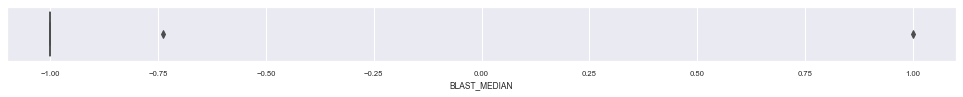

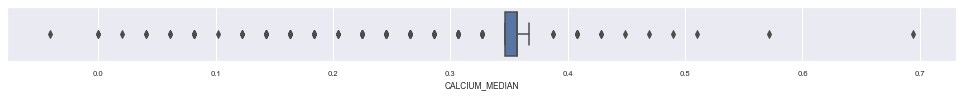

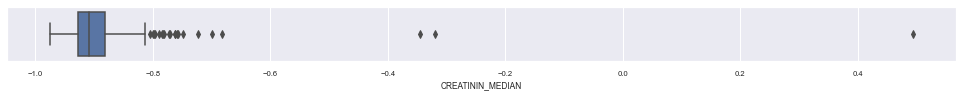

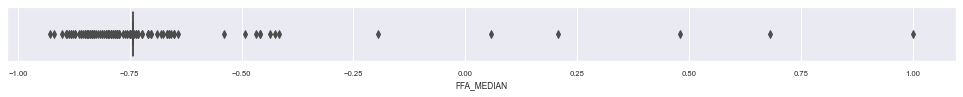

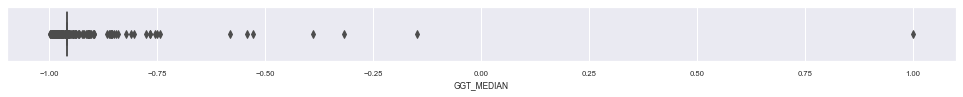

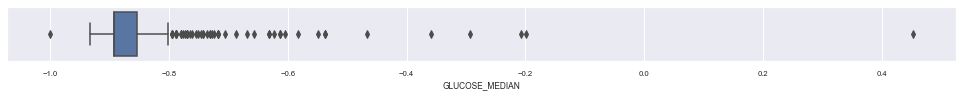

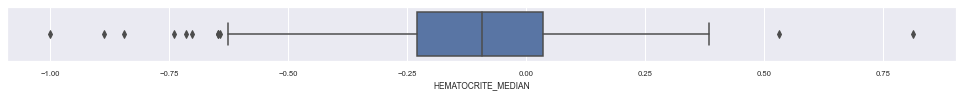

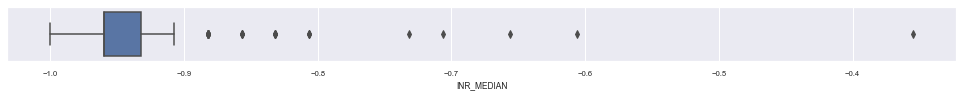

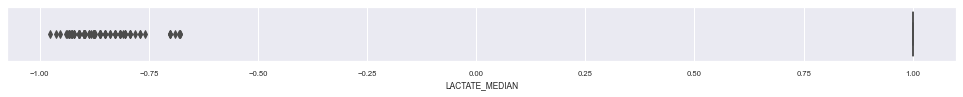

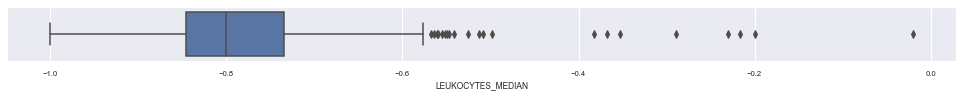

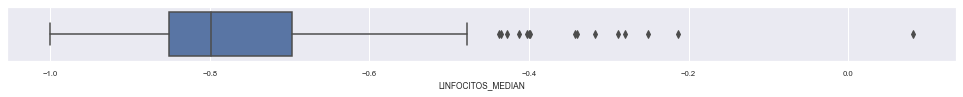

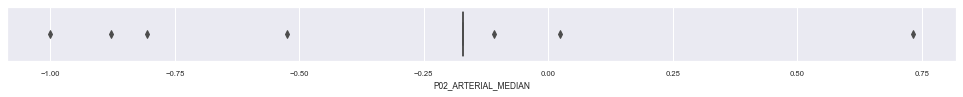

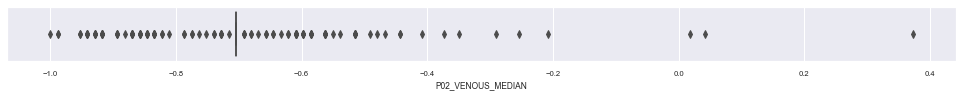

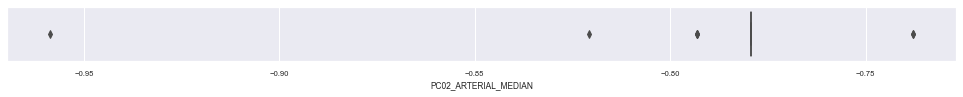

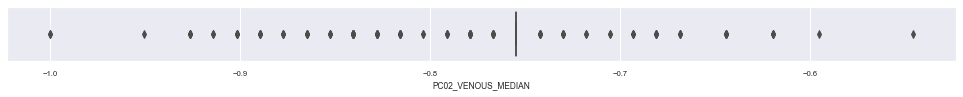

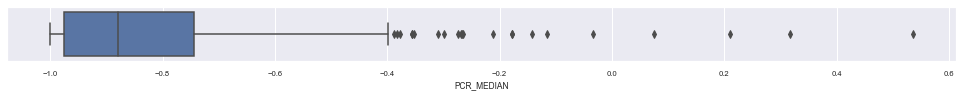

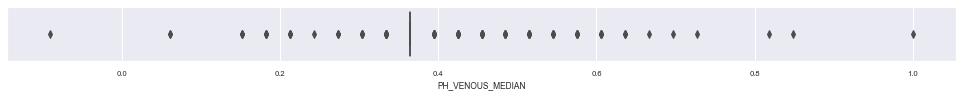

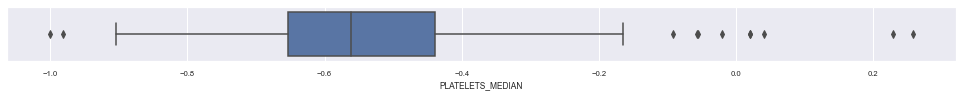

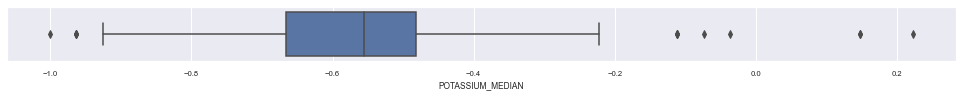

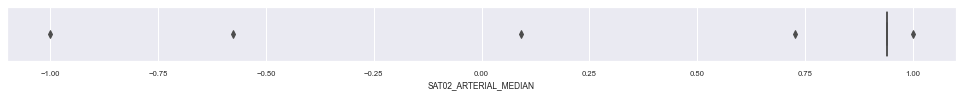

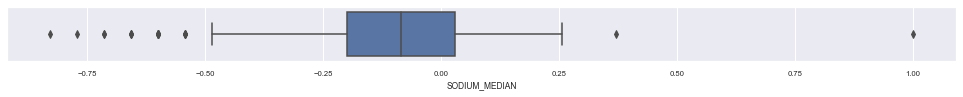

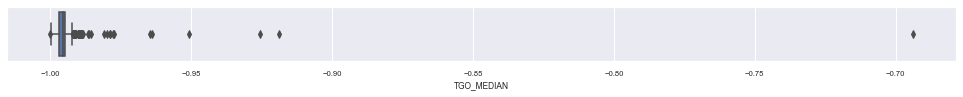

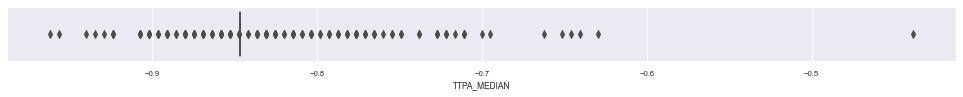

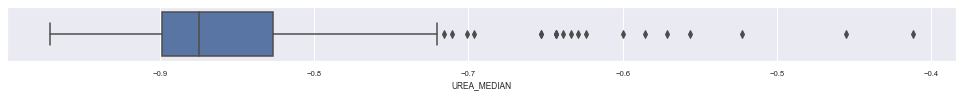

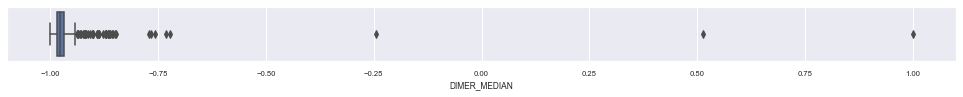

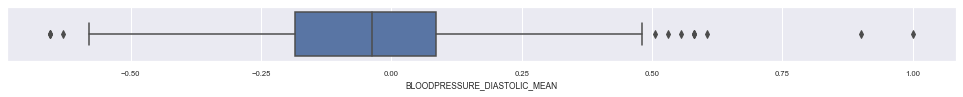

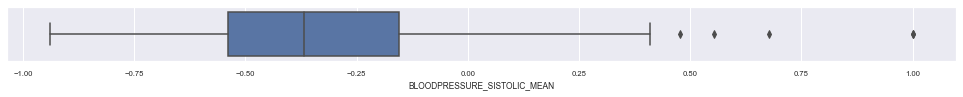

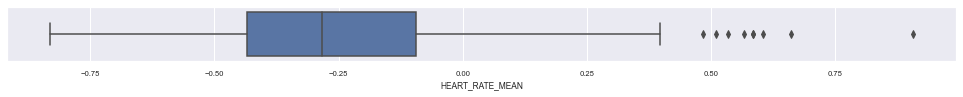

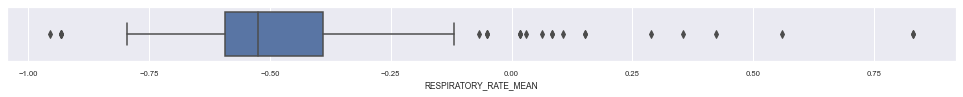

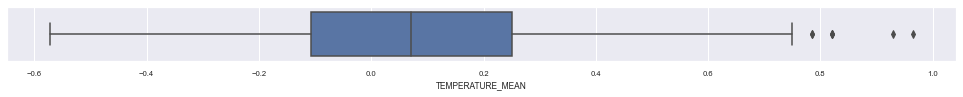

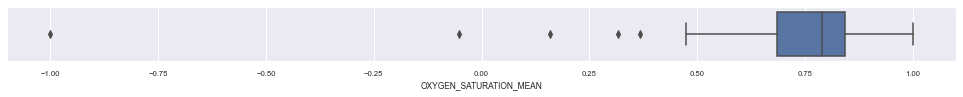

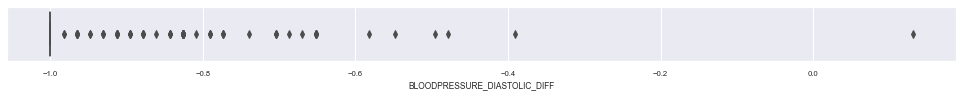

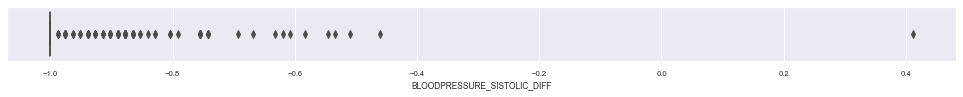

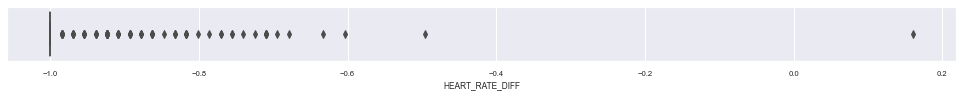

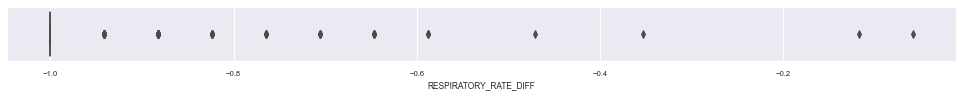

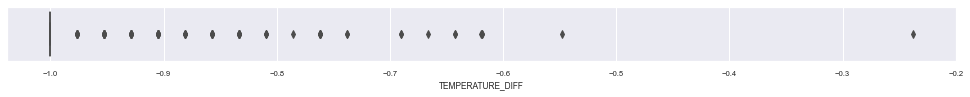

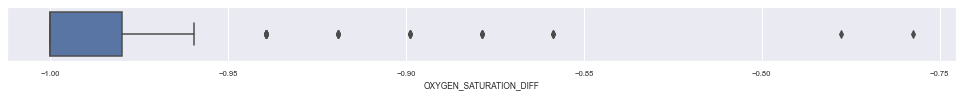

In [63]:
# Display boxplot
for column in FinalCovidDF.iloc[:,13:-3].columns:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=FinalCovidDF, x=column)


Observation:

* Almost all of the features have outliers, which need to be handled

In [64]:
# Handle Outliers using IQR 
def RemoveDfOutliers(ds,columnName):
    quartile1=ds[columnName].quantile(.25)
    quartile3=ds[columnName].quantile(.75)
    iqr_Val=quartile3-quartile1
    ulimit=quartile3 + (1.5 * iqr_Val)
    llimit=quartile1 - (1.5 * iqr_Val)
    a = ds[columnName] > ulimit
    b = ds[columnName] < llimit
    ds[columnName] = np.where(a, ulimit, ds[columnName]) 
    ds[columnName] = np.where(b, llimit, ds[columnName])
    return ds

In [65]:
# Remove outliers
for column in FinalCovidDF.iloc[:,13:-3].columns:
    FinalCovidDF=RemoveDfOutliers(FinalCovidDF,column)

Observation:
   * Outliers from all the fields have been removed

# Model Building:

In [66]:
#Remove 'ICU' from dataset as now the target column in 'Final_ICU'
#Also removing 'WINDOW' column as this dataset have one window(0-2) data and 'PATIENT_VISIT_IDENTIFIER' 
sizeDfBefore = FinalCovidDF.shape[1]
FinalCovidDF.drop(columns=['ICU', 'WINDOW','PATIENT_VISIT_IDENTIFIER'], inplace=True)
sizeDfAfter = FinalCovidDF.shape[1]

print(f"Dataset Size Before = {sizeDfBefore}")
print(f"Dataset Size After = {sizeDfAfter}")
print("")
print(f"Total Columns Removed = {sizeDfBefore - sizeDfAfter}")

Dataset Size Before = 58
Dataset Size After = 55

Total Columns Removed = 3


In [67]:
#independent and dependent variables
newCovidDF=FinalCovidDF.copy()
X=newCovidDF.loc[:,newCovidDF.columns!='Final_ICU']
Y=newCovidDF.loc[:,newCovidDF.columns=='Final_ICU']

### Handle Imbalance Data

In [68]:
FinalCovidDF['Final_ICU'].value_counts(normalize=True)

0    0.536932
1    0.463068
Name: Final_ICU, dtype: float64

Observation:

   * The target column is almost imbalanced
   * We will use SMOTE to balance the target column

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
columns=X_train.columns

In [70]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state = 10)

In [71]:
# Using SMOTE for oversampling our train data having features X_train and target in y_train
smTrainX,smTrainY=smote.fit_resample(X_train, y_train.Final_ICU)

In [72]:
smTrainX=pd.DataFrame(data=smTrainX,columns=columns)
smTrainY=pd.DataFrame(smTrainY,columns=['Final_ICU'])

<AxesSubplot:>

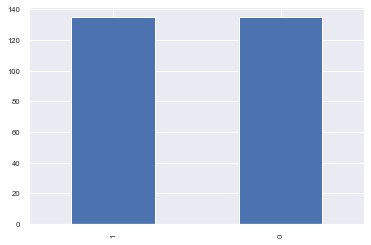

In [73]:
# Check after handling imbalance
smTrainY['Final_ICU'].value_counts().plot.bar()


Observation:

   * After handling imbalanced data our dataset is now ready for model creation 
   * As the dataset is already given scaled by MinMaxScaler we will not perform scaling

In [74]:
smTrainX.shape,X_test.shape

((270, 54), (106, 54))

### Model Building Steps:
    
    * Models selected for prediction are
    
        1: LogisticRegression
        2: KNN
        3: SVM
        4: DecisionTree
        5: RandomForest
        6: Bagging
        7: AdaBoost
        8: GradientBoost
        
    * First step is to find hyperparameter for every algorithm using GridSearchCV 
    * The Models will be build with best parameters
    * Finally all models will be evaluated by different matrics and make conclusion accordingly
    

In [76]:
# Function to tune hyperparameter of model using cross validation
def tuneHyperParamter(model,params):
    
    np.random.seed(500)
    
    gridCV = GridSearchCV ( estimator = model , param_grid = params , cv = 10, return_train_score = True )

    gridCV.fit ( smTrainX , smTrainY )    

    trainAccuracy=round(gridCV.best_score_,3)     
    
    tuneResult={}
    tuneResult['Best Param'] = gridCV.best_params_
    tuneResult['Train Accuracy'] = trainAccuracy
    
    return tuneResult   

In [85]:
finalResult= pd.DataFrame()

In [78]:
# Function to fit model
def fitModel(modelName,model,trainAccuracy,idx): 
    np.random.seed(500)
        
    model.fit(smTrainX, smTrainY)   

    yPredicted=model.predict(X_test)
    accuracy=round(accuracy_score(y_test,yPredicted),3)
    recall=round(recall_score(y_test,yPredicted),3)
    precision = round(precision_score(y_test,yPredicted),3)
    f1=round(f1_score(y_test,yPredicted),3)
    
    tempModelResult_dict = {}
    tempModelResult_dict['Method'] = modelName
    tempModelResult_dict['Train Accuracy'] = trainAccuracy
    tempModelResult_dict['Test Accuracy'] = accuracy
    tempModelResult_dict['Precision'] = precision
    tempModelResult_dict['Recall'] = recall
    tempModelResult_dict['F1'] = f1
    
    modelTempResult = pd.DataFrame(tempModelResult_dict,index={idx})
    
    return modelTempResult
   


#### 1: Logistic Regression

In [79]:
param_Logistic ={'C': [0.01, 0.1, 1, 2, 10, 100]
                 ,'penalty': ['l1', 'l2']}
                
logreg_Model=LogisticRegression(solver="liblinear",random_state=100)

tunedResult=tuneHyperParamter(logreg_Model,param_Logistic)
logregTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'C': 1, 'penalty': 'l2'}, 'Train Accuracy': 0.681}

#### 1.1: Logsitic Regression with tuned hyperparameter

In [86]:
logregModel = LogisticRegression(solver="liblinear"
                                 ,C=1
                                 ,penalty='l2'
                                 ,random_state=100)
tempResult=fitModel('Logistic Regression',logregModel,logregTestAccuracy,1)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.82,0.788,0.804


#### 1.2: Important Features

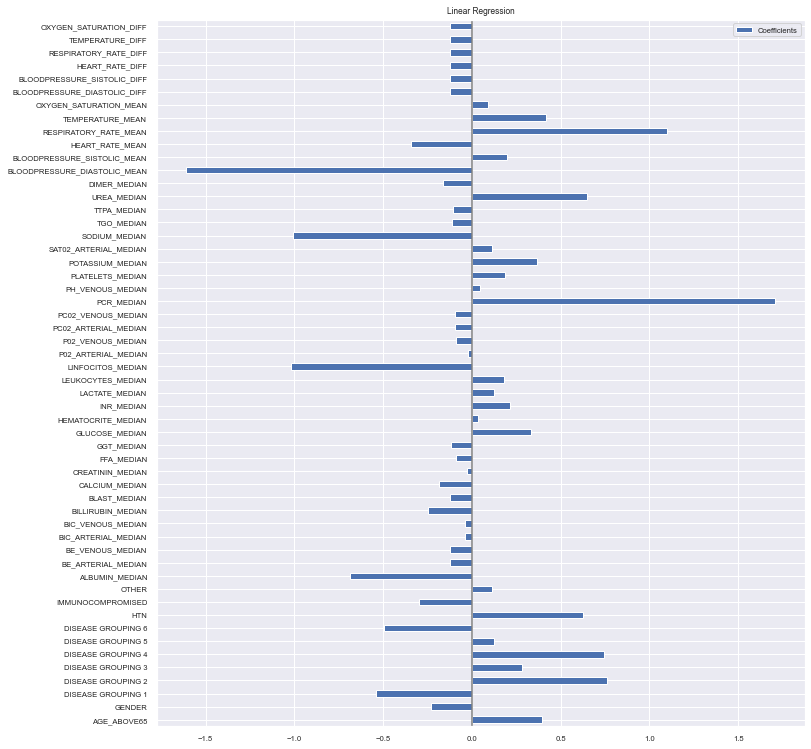

In [103]:
imp=logregModel.coef_
coe = pd.DataFrame(
   imp.T,
   columns=['Coefficients'], index=smTrainX.columns
)

coe.plot(kind='barh', figsize=(15, 13))
plt.title('Linear Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Observation:
   * Model has used all features available
   * PCR_MEDIAN is having high importance it is highly positive corelated to target

#### 2: KNN

In [83]:
param_knn = {'n_neighbors': list(range(1,9)),
             'leaf_size': (20,40,1),
             'p': (1,2),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute'),
             'metric': ['minkowski', 'chebyshev'],
             'weights': ["uniform", "distance"]}

knn_Model=KNeighborsClassifier()

tunedResult=tuneHyperParamter(knn_Model,param_knn)
knnTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'algorithm': 'auto',
  'leaf_size': 20,
  'metric': 'minkowski',
  'n_neighbors': 8,
  'p': 1,
  'weights': 'distance'},
 'Train Accuracy': 0.674}

#### 2.1: KNN with tuned hyperparameter

In [104]:
knn_Model = KNeighborsClassifier(n_neighbors=8
                                 ,leaf_size=20
                                 ,metric='minkowski'
                                 ,algorithm='auto'
                                 ,weights='distance'
                                ,p=1)
tempResult=fitModel('KNN',knn_Model,knnTestAccuracy,2)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695


#### 3: SVM

In [106]:
param_SVM = {'C': [0.1,1, 10, 100],
             'gamma': [1,0.1,0.01,0.001],
             'kernel': ['rbf', 'poly', 'sigmoid']}
                
svm_Model=svm.SVC(random_state=100)

tunedResult=tuneHyperParamter(svm_Model,param_SVM)
svmTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'C': 1, 'gamma': 0.1, 'kernel': 'poly'},
 'Train Accuracy': 0.696}

#### 3.1: SVM with tuned hyperparameter

In [107]:
svm_Model = svm.SVC(C= 1
                    ,gamma=0.1
                    ,kernel='poly'                    
                    ,random_state=100)
tempResult=fitModel('SVM',svm_Model,svmTestAccuracy,3)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695
3,SVM,0.696,0.764,0.776,0.731,0.752


#### 3.2: Important Features

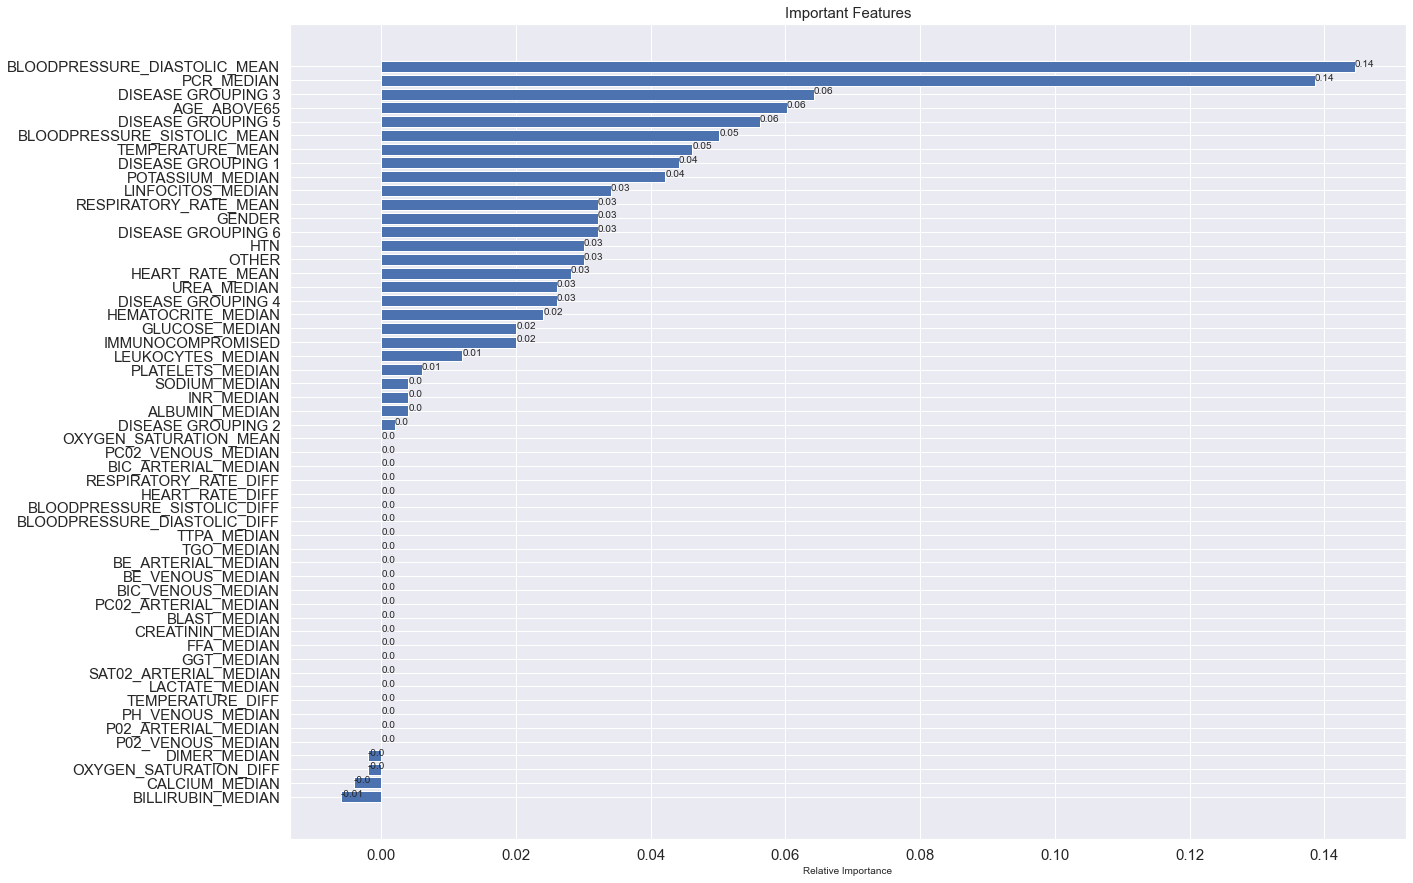

In [114]:
from sklearn.inspection import permutation_importance
perImportance = permutation_importance(svm_Model, smTrainX, smTrainY)
perImportance_normalized = perImportance.importances_mean/perImportance.importances_mean.sum()

fn = smTrainX.columns
fNames = np.array(fn)
sIdx = perImportance_normalized.argsort()


plt.figure(figsize=(20,15))
plt.title('Important Features',fontsize=15)
plt.barh(fNames[sIdx], perImportance_normalized[sIdx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for i, v in enumerate(perImportance_normalized[sIdx]):
    plt.text(v, i,str(round(v,2)), fontsize=10)

plt.show()


#### 4: DecisionTree

In [108]:
param_dt = {'max_leaf_nodes': list(range(2, 50))
            ,'min_samples_split': [2, 3, 4]
            ,'max_depth' :[5, 6, 7, 8, 9]
            ,'criterion' :['gini', 'entropy']}
                
dt_Model=DecisionTreeClassifier(random_state=100)

tunedResult=tuneHyperParamter(dt_Model,param_dt)
dsTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'criterion': 'entropy',
  'max_depth': 9,
  'max_leaf_nodes': 35,
  'min_samples_split': 2},
 'Train Accuracy': 0.681}

#### 4.1: Decison Tree with tuned hyperparameter

In [115]:
dt_Model = DecisionTreeClassifier(criterion="entropy"
                                  ,max_depth=9
                                  ,max_leaf_nodes=35
                                  ,min_samples_split=2
                                  ,random_state=100)
tempResult=fitModel('DecisionTree',dt_Model,dsTestAccuracy,4)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695
3,SVM,0.696,0.764,0.776,0.731,0.752
4,DecisionTree,0.681,0.604,0.614,0.519,0.562


#### 4.2: Important Features

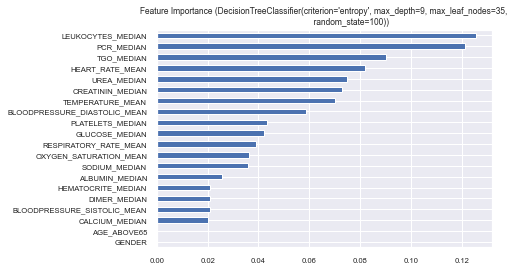

In [119]:
impFeatures = pd.Series(dt_Model.feature_importances_, index=smTrainX.columns)
impFeatures = impFeatures.nlargest(20).sort_values()
impFeatures.plot(kind="barh", title="Feature Importance ({:})".format(dt_Model))
plt.show()

#### 5: Random Forest

In [120]:
param_randomForest = {'bootstrap': [True, False],                                                
                        'min_samples_leaf': [1, 2, 4],
                        'min_samples_split': [2, 5, 10],
                        'criterion' :['gini', 'entropy'],
                        'n_estimators': [90, 100, 115, 130]}
                
randomForest_Model=RandomForestClassifier(random_state=100)

tunedResult=tuneHyperParamter(randomForest_Model,param_randomForest)
randomForestTestAccuracy=tunedResult['Train Accuracy']
tunedResult


{'Best Param': {'bootstrap': False,
  'criterion': 'entropy',
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 130},
 'Train Accuracy': 0.726}

#### 5.1: Random Forest with tuned hyperparameter

In [121]:
randomForest_Model = RandomForestClassifier(bootstrap = False,                                                
                                            min_samples_leaf = 2,
                                            min_samples_split = 10,
                                            criterion = 'entropy',
                                            n_estimators = 130,
                                             random_state=100)
tempResult=fitModel('Random Forest',randomForest_Model,randomForestTestAccuracy,5)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695
3,SVM,0.696,0.764,0.776,0.731,0.752
4,DecisionTree,0.681,0.604,0.614,0.519,0.562
5,Random Forest,0.726,0.811,0.833,0.769,0.800


#### 5.2: Important Features

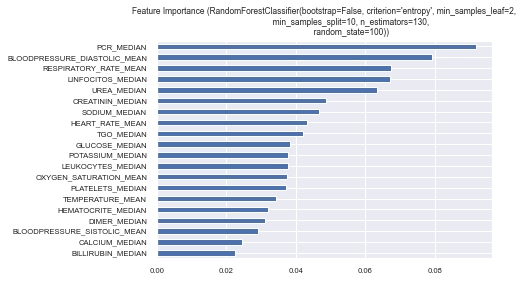

In [122]:
impFeatures = pd.Series(randomForest_Model.feature_importances_, index=smTrainX.columns)
impFeatures = impFeatures.nlargest(20).sort_values()
impFeatures.plot(kind="barh", title="Feature Importance ({:})".format(randomForest_Model))
plt.show()

#### 6: Bagging 

In [123]:
param_bagging = {'n_estimators': [20,50,100],    
                 'max_samples' : [0.05, 0.1, 0.2, 0.5]}

baggingC_Model=BaggingClassifier(base_estimator=dt_Model, max_features = 0.5 ,random_state=100)

tunedResult=tuneHyperParamter(baggingC_Model,param_bagging)
baggingTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'max_samples': 0.5, 'n_estimators': 20},
 'Train Accuracy': 0.737}

#### 6.1: Bagging  with tuned hyperparameter

In [124]:
baggingC_Model = BaggingClassifier(base_estimator=dt_Model
                                   , n_estimators = 20
                                   , max_features = 0.5 
                                   , max_samples=0.5                                   
                                   ,random_state=100)
tempResult=fitModel('Bagging',baggingC_Model,baggingTestAccuracy,6)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695
3,SVM,0.696,0.764,0.776,0.731,0.752
4,DecisionTree,0.681,0.604,0.614,0.519,0.562
5,Random Forest,0.726,0.811,0.833,0.769,0.800
6,Bagging,0.737,0.755,0.795,0.673,0.729


#### 6.2: Important Features:

<AxesSubplot:xlabel='features'>

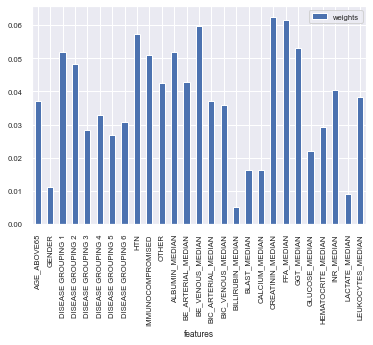

In [170]:
impFeature = np.mean([t.feature_importances_ for t in baggingC_Model.estimators_], axis=0)
dfImpFeat = pd.DataFrame({"features":smTrainX.columns}).join(pd.DataFrame({"weights":impFeature}))
dfImpFeat=dfImpFeat.loc[dfImpFeat['weights'].notnull()]
dfImpFeat.plot(x='features', y='weights', kind='bar')

#### 7: AdaBoost

In [171]:
param_adaboost = {'n_estimators': [10, 50, 100, 200, 500],  
                 'learning_rate': [0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]}

adaboost_Model=AdaBoostClassifier(base_estimator=dt_Model ,random_state=100)

tunedResult=tuneHyperParamter(adaboost_Model,param_adaboost)
adaboostTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'learning_rate': 1.0, 'n_estimators': 100},
 'Train Accuracy': 0.763}

#### 7.1: AdaBoost  with tuned hyperparameter

In [172]:
adaboost_Model = AdaBoostClassifier(base_estimator=dt_Model
                                   ,n_estimators = 100
                                   ,learning_rate= 1.0                                  
                                   ,random_state=100)
tempResult=fitModel('AdaBoost',adaboost_Model,adaboostTestAccuracy,7)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695
3,SVM,0.696,0.764,0.776,0.731,0.752
4,DecisionTree,0.681,0.604,0.614,0.519,0.562
5,Random Forest,0.726,0.811,0.833,0.769,0.800
6,Bagging,0.737,0.755,0.795,0.673,0.729
7,AdaBoost,0.763,0.764,0.814,0.673,0.737


#### 7.2: Important Features

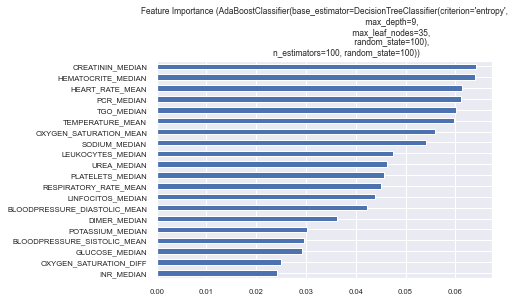

In [173]:
impFeatures = pd.Series(adaboost_Model.feature_importances_, index=smTrainX.columns)
impFeatures = impFeatures.nlargest(20).sort_values()
impFeatures.plot(kind="barh", title="Feature Importance ({:})".format(adaboost_Model))
plt.show()

#### 8: GradientBoost

In [174]:
param_gradientBoost = {"n_estimators":[5,50,250,500],
                        "max_depth":[1,3,5,7,9],
                        "learning_rate":[0.01,0.1,1,10,100]}

gradientBoost_Model=GradientBoostingClassifier(random_state=100)

tunedResult=tuneHyperParamter(gradientBoost_Model,param_gradientBoost)
gradientBoostTestAccuracy=tunedResult['Train Accuracy']
tunedResult

{'Best Param': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500},
 'Train Accuracy': 0.722}

#### 8.1:GradientBoost  with tuned hyperparameter

In [175]:
gradientBoost_Model = GradientBoostingClassifier(n_estimators = 500
                                                 ,learning_rate= 0.1
                                                 ,max_depth=5
                                                 ,random_state=100)
tempResult=fitModel('Gradient Boost',gradientBoost_Model,gradientBoostTestAccuracy,8)
finalResult=pd.concat([finalResult, tempResult])
finalResult

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
2,KNN,0.674,0.726,0.767,0.635,0.695
3,SVM,0.696,0.764,0.776,0.731,0.752
4,DecisionTree,0.681,0.604,0.614,0.519,0.562
5,Random Forest,0.726,0.811,0.833,0.769,0.800
6,Bagging,0.737,0.755,0.795,0.673,0.729
7,AdaBoost,0.763,0.764,0.814,0.673,0.737
8,Gradient Boost,0.722,0.764,0.814,0.673,0.737


#### 8.2: Impotant Features

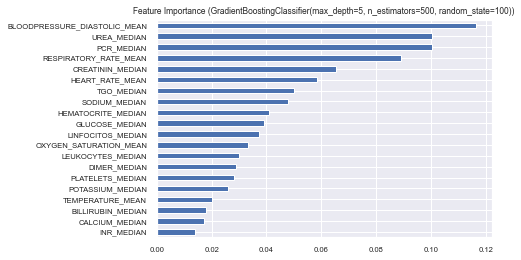

In [176]:
impFeatures = pd.Series(gradientBoost_Model.feature_importances_, index=smTrainX.columns)
impFeatures = impFeatures.nlargest(20).sort_values()
impFeatures.plot(kind="barh", title="Feature Importance ({:})".format(gradientBoost_Model))
plt.show()

In [179]:
finalResult.sort_values(by=['Test Accuracy','F1'],ascending=False)

,Method,Train Accuracy,Test Accuracy,Precision,Recall,F1
1,Logistic Regression,0.681,0.811,0.820,0.788,0.804
5,Random Forest,0.726,0.811,0.833,0.769,0.800
3,SVM,0.696,0.764,0.776,0.731,0.752
7,AdaBoost,0.763,0.764,0.814,0.673,0.737
8,Gradient Boost,0.722,0.764,0.814,0.673,0.737
6,Bagging,0.737,0.755,0.795,0.673,0.729
2,KNN,0.674,0.726,0.767,0.635,0.695
4,DecisionTree,0.681,0.604,0.614,0.519,0.562


# Conclusion

* Experimental results show that performance of LogisticRegression and Randomforest models are having good score 
  in terms of accuracy and F1 score.
* Logistic Regression and Randomforest models have equal accuracy of 0.811 where as F1 score is 0.804 for Logistic 
  Regression model and 0.800 for Random Forest models which are also almost same.Both can be used for predicting 
  whether COVID-19 confirmed patient would require ICU admission
* Model using Decision Tree is giving poor performance.
* PCR_MEDIAN,RESPIRATORY_RATE_MEDIAN,DISEASE GROUPING 2,DISEASE GROUPING 4,HTN are top important features from 
  logistic regression model.
* PCR_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,LINFOCITOS_MEDIAN,UREA_MEDIAN are the top important 
  features from Random Forest model.